In [73]:
fonts = ! fc-list --format="%{family[0]}\n" | sort | uniq
print(fonts)

! fc-list "Liberation Mono" : lang

! fc-list :spacing=mono : family | sort | uniq

['zsh:1: command not found: fc-list']
zsh:1: command not found: fc-list
zsh:1: command not found: fc-list


In [74]:
import matplotlib
loc = matplotlib.get_cachedir()
!ls {loc}

fontlist-v390.json


In [75]:
fonts = !cat {loc + '/fontlist-v330.json'}
fonts = set(list(filter(lambda x:'"name"' in x, fonts)))
fonts = [x.replace('      "name": "','').replace('",','') for x in fonts]
print(fonts)

[]


In [76]:
fonts = ! fc-list : family style | grep "Ubuntu"
print(sorted(fonts))

['zsh:1: command not found: fc-list']


In [77]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

tfont = {'fontname':'Liberation Sans Narrow', 'weight':'bold'}
bfont = {'fontname':'Liberation Sans Narrow', 'weight':'normal', 'horizontalalignment':'left'}
afont = {'fontname':'Liberation Sans Narrow', 'weight':'light'}

In [78]:
import pandas as pd
import geopandas as gpd

# Load the CSV data
data = pd.read_csv('/Users/victoriachen/Documents/My Baby Thesis/2nd_try/2_coverage/employment join with library.csv')

# Load the geographic data (e.g., GeoJSON or Shapefile)
geo_data = gpd.read_file('/Users/victoriachen/Documents/My Baby Thesis/phase 2- spatial accessibility/centroid to lib/fixed_27700.geojson')

In [79]:
print(f"Total rows in the dataset: {len(geo_data)}")
print(data.columns)

Total rows in the dataset: 983
Index(['MSOA11CD', 'sum', 'count_sdep', 'calculation', 'sdep_sum the dep rate',
       'library_name_sum', 'filtered_library_name_sum',
       'keyword_frequency_sum'],
      dtype='object')


In [80]:
merged_data = geo_data.merge(data, on='MSOA11CD')

merged_data['sdep_sum the dep rate'] = merged_data['sdep_sum the dep rate'].replace('#DIV/0!', 0)
print(merged_data)


      MSOA11CD                  MSOA11NM    LAD11CD               LAD11NM  \
0    E02000001        City of London 001  E09000001        City of London   
1    E02000002  Barking and Dagenham 001  E09000002  Barking and Dagenham   
2    E02000003  Barking and Dagenham 002  E09000002  Barking and Dagenham   
3    E02000004  Barking and Dagenham 003  E09000002  Barking and Dagenham   
4    E02000005  Barking and Dagenham 004  E09000002  Barking and Dagenham   
..         ...                       ...        ...                   ...   
978  E02006927             Greenwich 034  E09000011             Greenwich   
979  E02006928             Greenwich 035  E09000011             Greenwich   
980  E02006929             Greenwich 036  E09000011             Greenwich   
981  E02006930             Greenwich 037  E09000011             Greenwich   
982  E02006931             Greenwich 038  E09000011             Greenwich   

       RGN11CD RGN11NM  USUALRES  HHOLDRES  COMESTRES  POPDEN  HHOLDS  \
0 

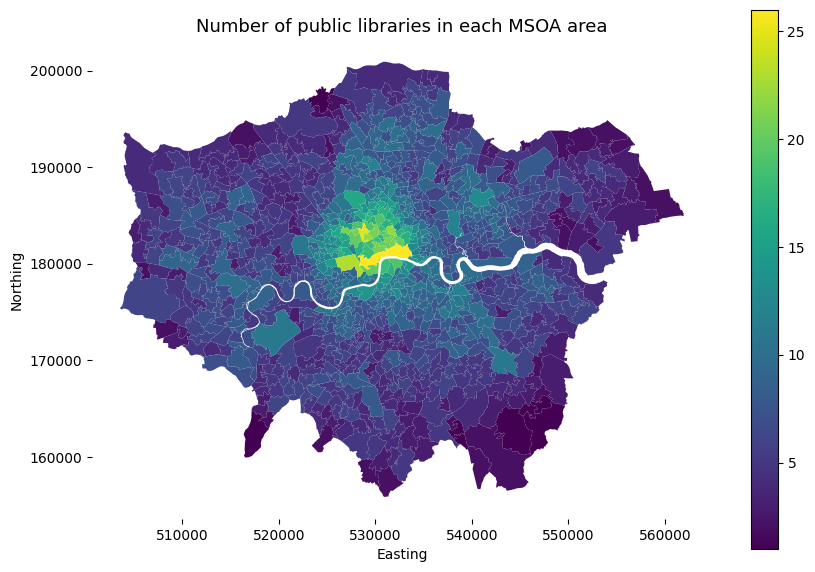

In [89]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

merged_data.plot(column='library_name_sum', 
                 cmap='viridis',         
                 legend=True, 
                 ax=ax)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set the labels
ax.set_xlabel("Easting");
ax.set_ylabel("Northing");



plt.grid(visible=True, which='major', axis='both', color='w', linestyle='-', linewidth=2, zorder=0)
ax.set_axisbelow(True)

# Customizing the title and labels
plt.title('Number of public libraries in each MSOA area', fontsize=13)
plt.show()


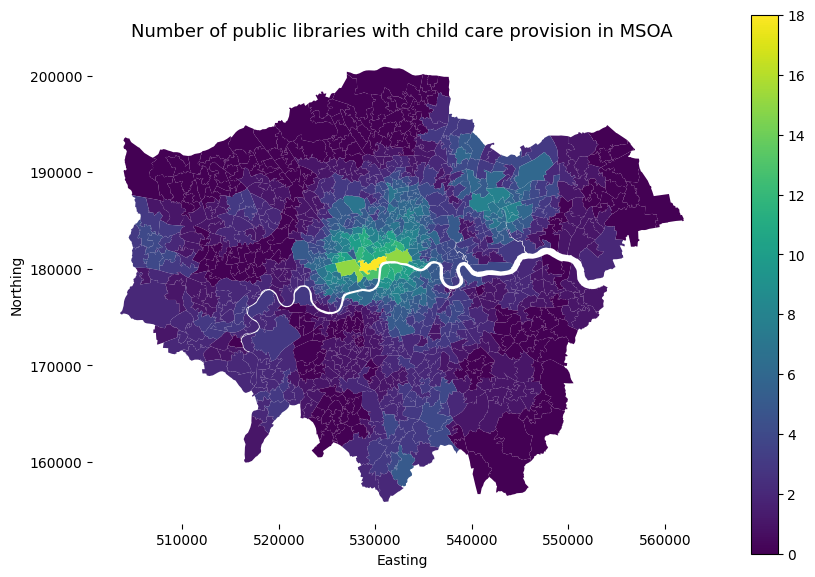

In [90]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

merged_data.plot(column='filtered_library_name_sum', 
                 cmap='viridis',          
                 legend=True, 
                 ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set the labels
ax.set_xlabel("Easting");
ax.set_ylabel("Northing");



plt.grid(visible=True, which='major', axis='both', color='w', linestyle='-', linewidth=2, zorder=0)
ax.set_axisbelow(True)

# Customizing the title and labels
plt.title('Number of public libraries with child care provision in MSOA', fontsize=13)
plt.show()


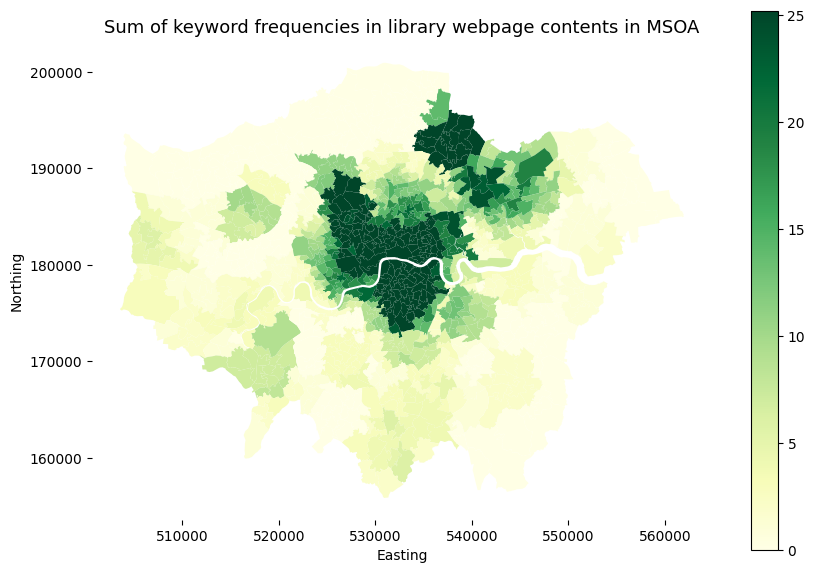

In [118]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

vmin = merged_data['keyword_frequency_sum'].min()  # You can set this to a custom value to make it darker
vmax = merged_data['keyword_frequency_sum'].max()


merged_data.plot(column='keyword_frequency_sum', 
                 cmap='YlGn',         
                 legend=True, 
                 ax=ax,
                 vmin=vmin * 30,  # Make the color scale start from a higher intensity (darker)
                 vmax=vmax * 0.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set the labels
ax.set_xlabel("Easting");
ax.set_ylabel("Northing");



plt.grid(visible=True, which='major', axis='both', color='w', linestyle='-', linewidth=2, zorder=0)
ax.set_axisbelow(True)

# Customizing the title and labels
plt.title('Sum of keyword frequencies in library webpage contents in MSOA', fontsize=13)
plt.show()


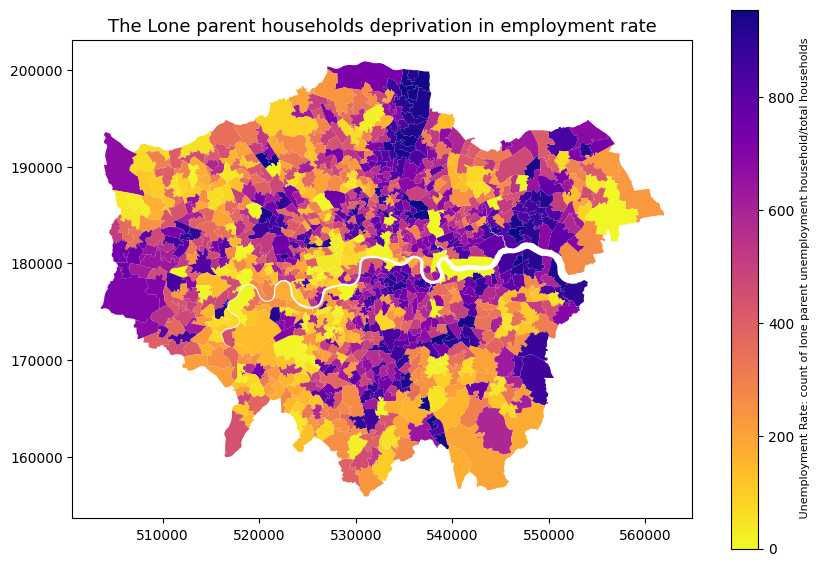

In [117]:
import matplotlib.pyplot as plt

# Plotting with a lighter colormap and enhanced contrast
fig, ax = plt.subplots(1, 1, figsize=(10, 7))



plot = merged_data.plot(column='sdep_sum the dep rate', 
                 cmap='plasma_r', 
                 legend=False, 
                 ax=ax,)


# Add a colorbar to represent the continuous colormap
cbar = plt.colorbar(plot.get_children()[0], ax=ax)
cbar.set_label(' Unemployment Rate: count of lone parent unemployment household/total households', fontsize=8)  # Optional: Add a label to the colorbar


# Customizing the title and labels
plt.title('The Lone parent households deprivation in employment rate', fontsize=13)
plt.show()


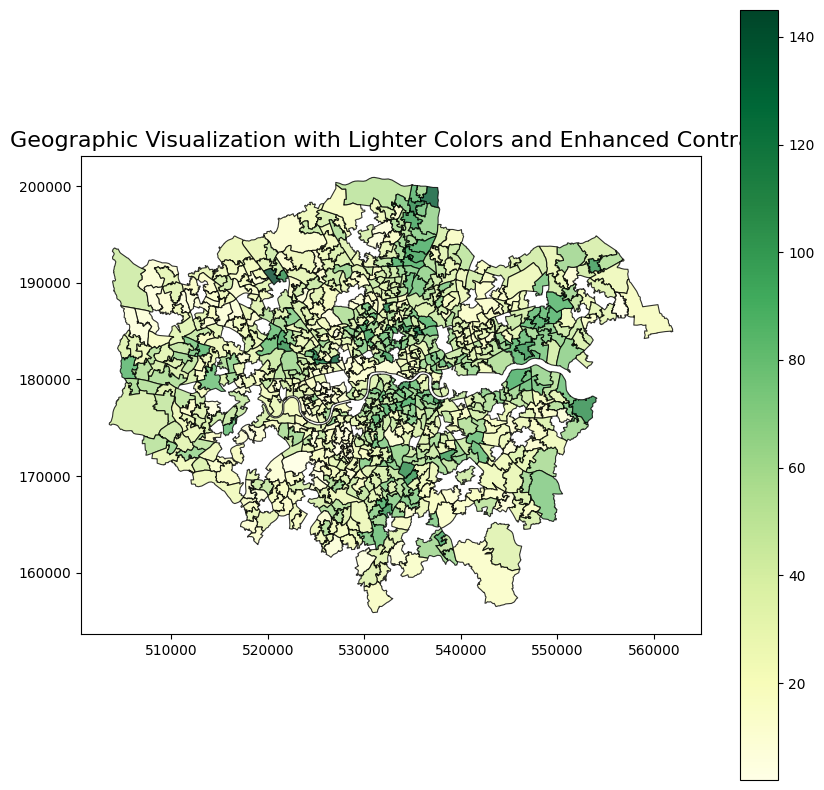

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged_data.plot(column='sin_kid_dep', 
                 cmap='YlGn',        # Use a lighter colormap
                 linewidth=0.8,      # Increase boundary line width
                 edgecolor='black',  # Set boundary color to black for contrast
                 alpha=0.8,          # Adjust transparency
                 legend=True, 
                 ax=ax)

# Customizing the title and labels
plt.title('Geographic Visualization with Lighter Colors and Enhanced Contrast', fontsize=16)
plt.show()

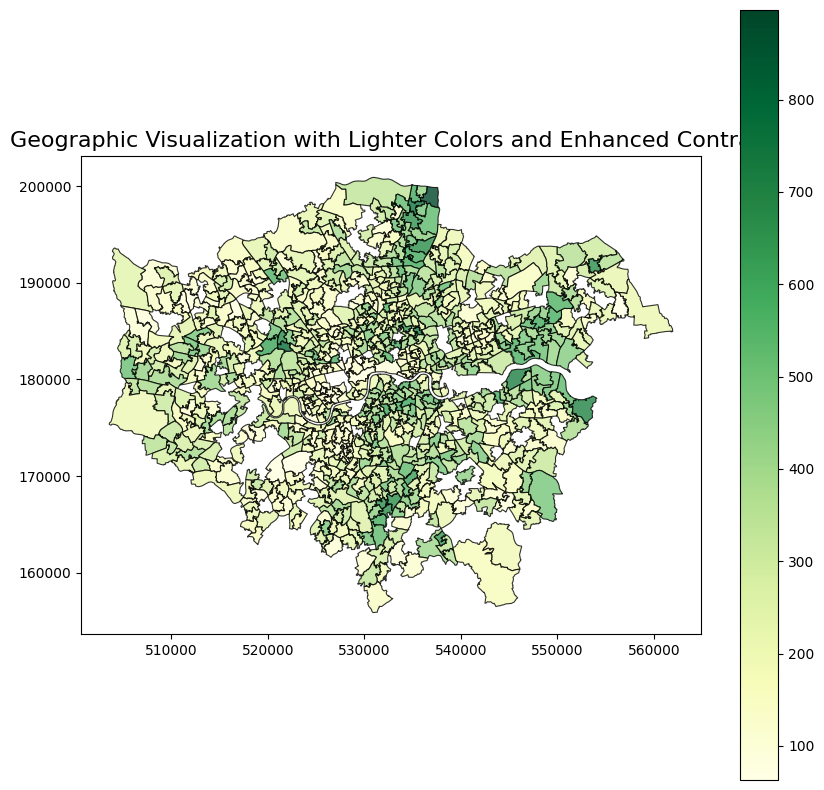

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged_data.plot(column='sin_kid', 
                 cmap='YlGn',        # Use a lighter colormap
                 linewidth=0.8,      # Increase boundary line width
                 edgecolor='black',  # Set boundary color to black for contrast
                 alpha=0.8,          # Adjust transparency
                 legend=True, 
                 ax=ax)

# Customizing the title and labels
plt.title('Geographic Visualization with Lighter Colors and Enhanced Contrast', fontsize=16)
plt.show()

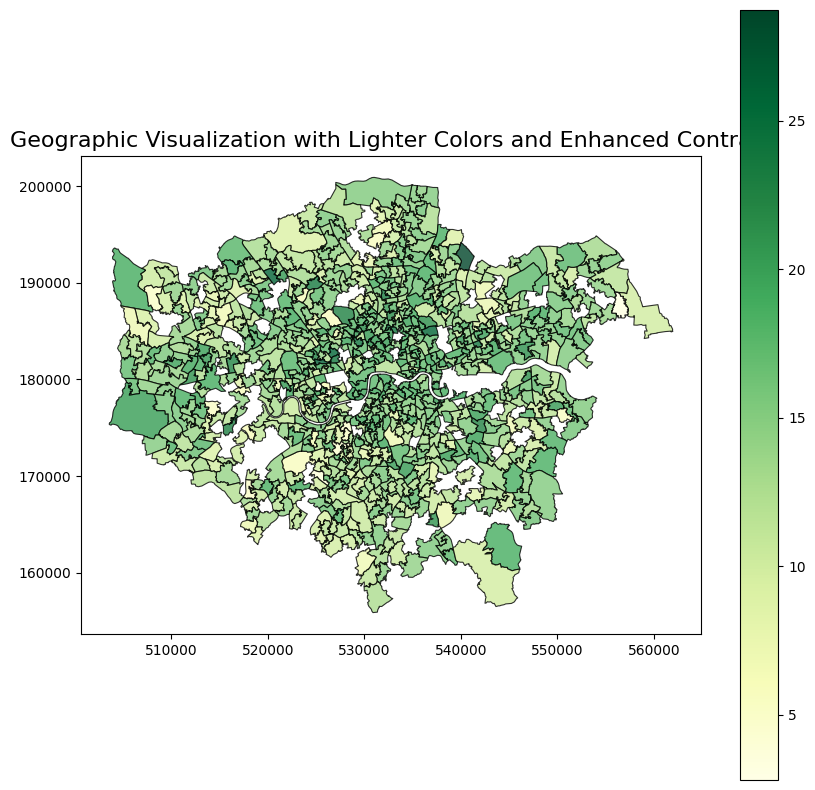

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

merged_data.plot(column='sin_kid_dep/sin_kid', 
                 cmap='YlGn',        # Use a lighter colormap
                 linewidth=0.8,      # Increase boundary line width
                 edgecolor='black',  # Set boundary color to black for contrast
                 alpha=0.8,          # Adjust transparency
                 legend=True, 
                 ax=ax)

# Customizing the title and labels
plt.title('Geographic Visualization with Lighter Colors and Enhanced Contrast', fontsize=16)
plt.show()